### Q1: Import / Load

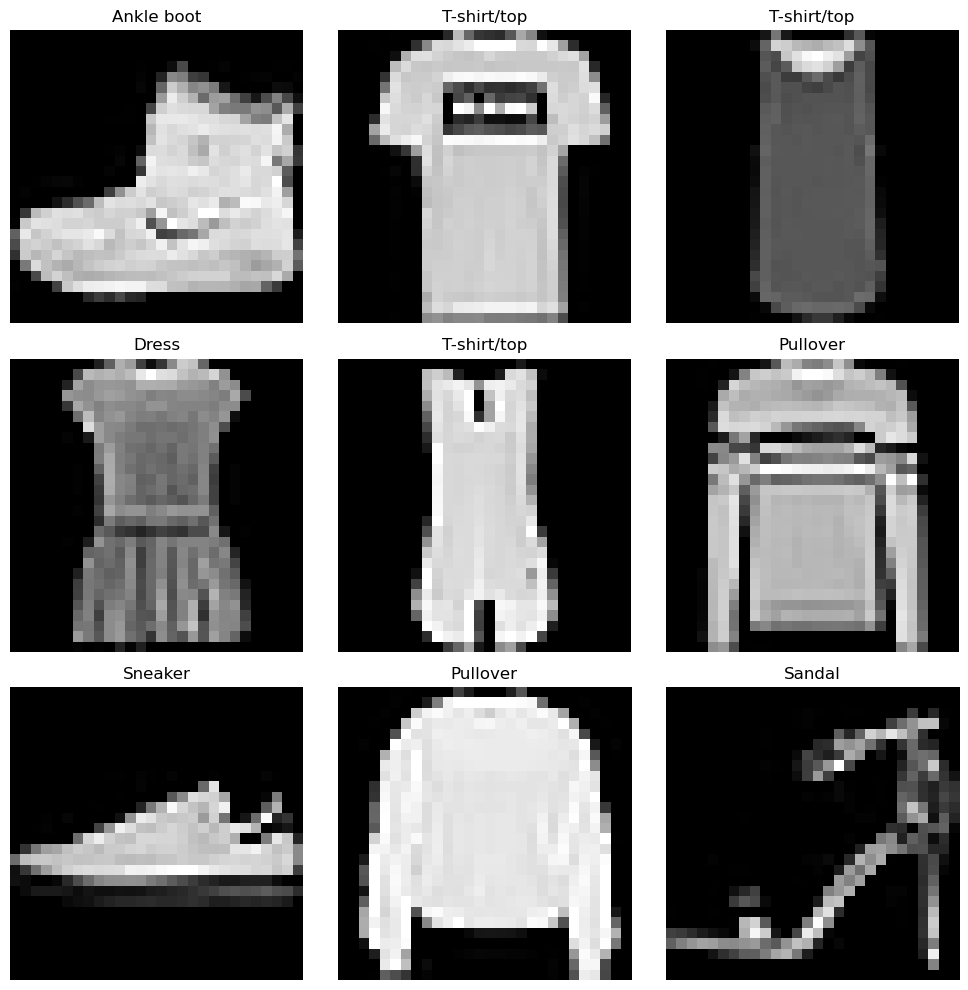

In [6]:
# Step 1: Import libraries and set random seeds
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]


# Visualize a few samples
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### one hot encode


In [7]:
# Step 1 (continued): Flatten and normalize, then one-hot encode
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 28*28).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


### Define and compile baseline model

In [8]:
def create_baseline_model():
    model = Sequential([
        layers.Input(shape=(784,)),         # 28x28 flattened
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

baseline_model = create_baseline_model()
baseline_model.summary()

baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Train model

In [9]:
history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

test_loss_b, test_acc_b = baseline_model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline (no reg / no dropout) - Test accuracy: {test_acc_b*100:.2f}%")


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8234 - loss: 0.5058 - val_accuracy: 0.8468 - val_loss: 0.4302
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3703 - val_accuracy: 0.8612 - val_loss: 0.3883
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.3314 - val_accuracy: 0.8656 - val_loss: 0.3737
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.3050 - val_accuracy: 0.8687 - val_loss: 0.3651
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2864 - val_accuracy: 0.8734 - val_loss: 0.3584
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.2691 - val_accuracy: 0.8782 - val_loss: 0.3476
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9060 - loss: 0.2552 - val_accuracy: 0.8774 - val_loss: 0.3527
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.2423 - val_accuracy: 0.

### plot

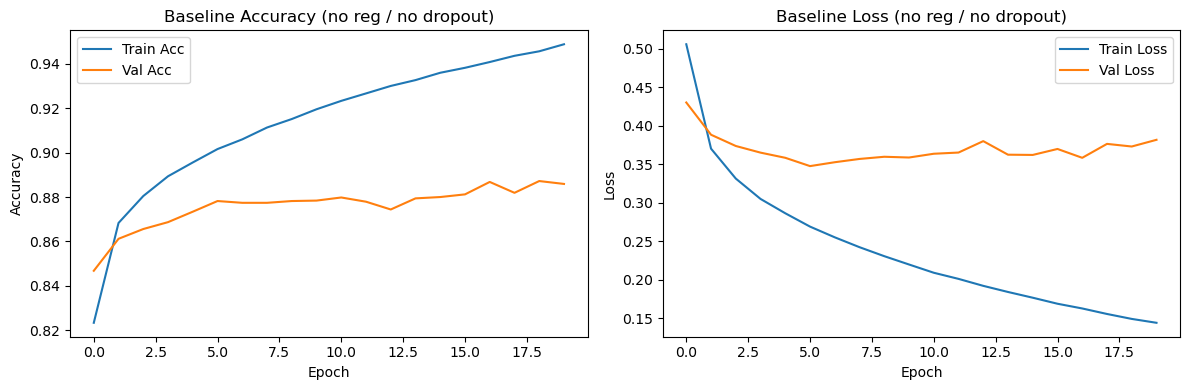

In [10]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_baseline.history['accuracy'], label='Train Acc')
plt.plot(history_baseline.history['val_accuracy'], label='Val Acc')
plt.title('Baseline Accuracy (no reg / no dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Val Loss')
plt.title('Baseline Loss (no reg / no dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# L2 regularization

In [13]:

from tensorflow.keras import regularizers
def create_l2_model(l2_lambda=0.001):
    model = Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512,
                     activation='relu',
                     kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dense(10, activation='softmax')
    ])
    return model



--- Training with L2 regularization = 0.0001 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8235 - loss: 0.5657 - val_accuracy: 0.8442 - val_loss: 0.4926
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.4348 - val_accuracy: 0.8593 - val_loss: 0.4456
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.3971 - val_accuracy: 0.8653 - val_loss: 0.4295
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3743 - val_accuracy: 0.8678 - val_loss: 0.4212
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3586 - val_accuracy: 0.8691 - val_loss: 0.4137
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.3474 - val_accuracy: 0.8727 - val_loss: 0.4109
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8968 - loss: 0.3352 - val_accuracy: 0.8722 - val_loss: 0.4127
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - 

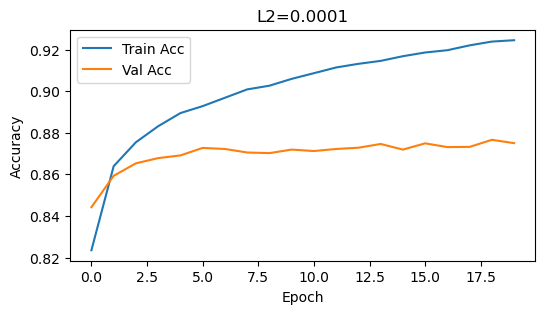


--- Training with L2 regularization = 0.001 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8172 - loss: 0.8327 - val_accuracy: 0.8408 - val_loss: 0.6335
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.5626 - val_accuracy: 0.8533 - val_loss: 0.5316
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.4955 - val_accuracy: 0.8565 - val_loss: 0.4933
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.4645 - val_accuracy: 0.8617 - val_loss: 0.4758
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8668 - loss: 0.4481 - val_accuracy: 0.8634 - val_loss: 0.4615
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.4356 - val_accuracy: 0.8651 - val_loss: 0.4552
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.4252 - val_accuracy: 0.8700 - val_loss: 0.4471
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a

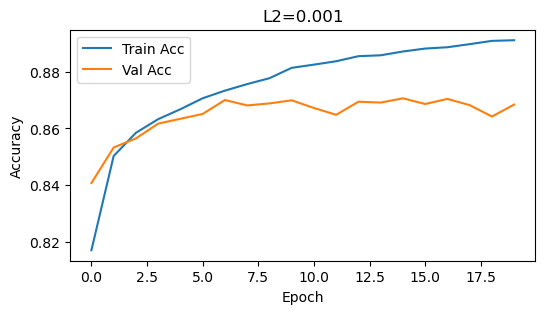


--- Training with L2 regularization = 0.01 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7975 - loss: 1.3299 - val_accuracy: 0.7932 - val_loss: 0.7340
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.6418 - val_accuracy: 0.7938 - val_loss: 0.7165
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8198 - loss: 0.6209 - val_accuracy: 0.7961 - val_loss: 0.6941
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.6041 - val_accuracy: 0.8026 - val_loss: 0.6757
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.5899 - val_accuracy: 0.8001 - val_loss: 0.6676
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8315 - loss: 0.5760 - val_accuracy: 0.8038 - val_loss: 0.6605
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8347 - loss: 0.5646 - val_accuracy: 0.8174 - val_loss: 0.6204
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

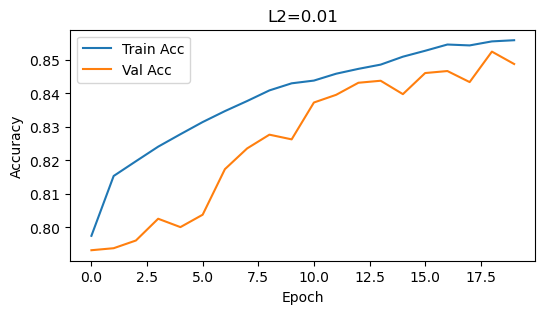

In [ ]:
for l2_val in [0.0001, 0.001, 0.01]:
    model = create_l2_model(l2_val)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n--- Training with L2 regularization = {l2_val} ---")
    history_l2 = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=128,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"L2={l2_val} → Test accuracy: {test_acc*100:.2f}%")

    plt.figure(figsize=(6,3))
    plt.plot(history_l2.history['accuracy'], label='Train Acc')
    plt.plot(history_l2.history['val_accuracy'], label='Val Acc')
    plt.title(f'L2={l2_val}')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.show()


# Dropout

In [15]:
def create_dropout_model(drop_rate=0.5):
    model = Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(drop_rate),
        layers.Dense(10, activation='softmax')
    ])
    return model



--- Training with dropout rate = 0.2 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8174 - loss: 0.5206 - val_accuracy: 0.8498 - val_loss: 0.4202
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3867 - val_accuracy: 0.8544 - val_loss: 0.3999
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8729 - loss: 0.3487 - val_accuracy: 0.8558 - val_loss: 0.3894
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.3256 - val_accuracy: 0.8668 - val_loss: 0.3669
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.3072 - val_accuracy: 0.8712 - val_loss: 0.3511
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2919 - val_accuracy: 0.8738 - val_loss: 0.3474
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8967 - loss: 0.2804 - val_accuracy: 0.8786 - val_loss: 0.3372
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

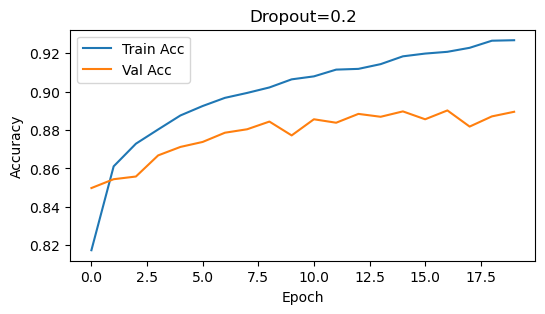


--- Training with dropout rate = 0.5 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7993 - loss: 0.5710 - val_accuracy: 0.8450 - val_loss: 0.4377
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.4272 - val_accuracy: 0.8574 - val_loss: 0.3983
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.3916 - val_accuracy: 0.8647 - val_loss: 0.3756
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.3719 - val_accuracy: 0.8693 - val_loss: 0.3648
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8691 - loss: 0.3540 - val_accuracy: 0.8712 - val_loss: 0.3543
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3449 - val_accuracy: 0.8738 - val_loss: 0.3469
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3313 - val_accuracy: 0.8761 - val_loss: 0.3468
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

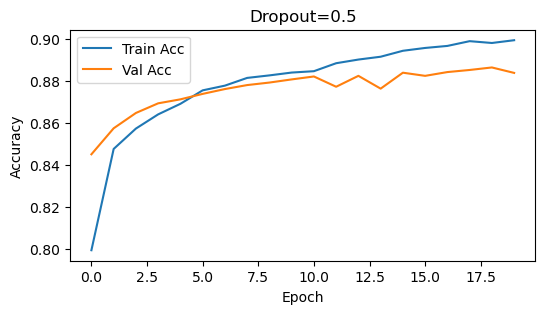


--- Training with dropout rate = 0.7 ---
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7714 - loss: 0.6422 - val_accuracy: 0.8375 - val_loss: 0.4587
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4852 - val_accuracy: 0.8476 - val_loss: 0.4200
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8373 - loss: 0.4500 - val_accuracy: 0.8544 - val_loss: 0.4022
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8432 - loss: 0.4299 - val_accuracy: 0.8608 - val_loss: 0.3888
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.4132 - val_accuracy: 0.8638 - val_loss: 0.3780
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.4034 - val_accuracy: 0.8669 - val_loss: 0.3734
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3986 - val_accuracy: 0.8672 - val_loss: 0.3695
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

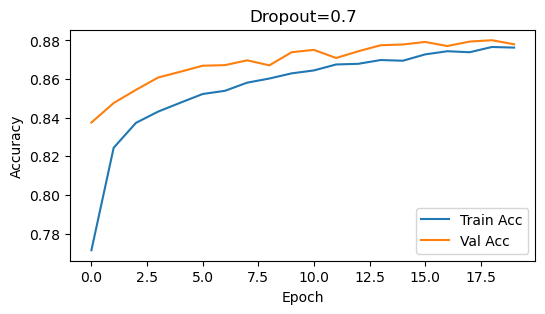

In [16]:
for dr in [0.2, 0.5, 0.7]:
    model = create_dropout_model(dr)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n--- Training with dropout rate = {dr} ---")
    history_dr = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=128,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Dropout={dr} → Test accuracy: {test_acc*100:.2f}%")

    # (Optional) quick plot to see overfitting change
    plt.figure(figsize=(6,3))
    plt.plot(history_dr.history['accuracy'], label='Train Acc')
    plt.plot(history_dr.history['val_accuracy'], label='Val Acc')
    plt.title(f'Dropout={dr}')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.show()
